In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

VERİ SETİNİN İNCELENMESİ

In [75]:
df1 = pd.read_csv("accident_data.csv")
df1.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [77]:
list(df1.columns)

['Index',
 'Accident_Severity',
 'Accident Date',
 'Latitude',
 'Light_Conditions',
 'District Area',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

In [78]:
# genel olarak veri setinde eksik görünmemekle birlikte hava şartları, yol tipi ve yol yüzeyi koşullarında az da olsa eksik veriler gözlemlenmekte
df1.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [79]:
# 19 adet tekrar eden veri gözlemlenmekte
df1.duplicated().sum()

19

VERİ SETİNİN TEMİZLENMESİ

In [80]:
# index kolonu bizim için anlam ifade etmemekte, bu sebeple kaldırıyoruz
df1.drop(["Index"], axis=1, inplace=True)

In [81]:
# tekrar eden ve eksik verileri siliyoruz
df1 = df1.drop_duplicates()
df1 = df1.dropna()
df1.reset_index(drop=True, inplace=True)

In [82]:
# Zaman verisini 
df1["Accident Date"] = pd.to_datetime(df1["Accident Date"], format="%d-%m-%Y")
df1.head()

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
3,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
4,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under


In [83]:
df2 = df1[["Road_Type", "Accident Date"]].resample("M", on="Accident Date").count()
df2.head()

,Road_Type
Accident Date,
2019-01-31,14903
2019-02-28,12889
2019-03-31,14679
2019-04-30,13748
2019-05-31,15332


In [84]:
df2.reset_index(inplace=True)
df2.rename({"Road_Type": "Sayı", "Accident Date": "Tarih"}, axis=1, inplace=True)
df2.head()

,Tarih,Sayı
0,2019-01-31,14903
1,2019-02-28,12889
2,2019-03-31,14679
3,2019-04-30,13748
4,2019-05-31,15332


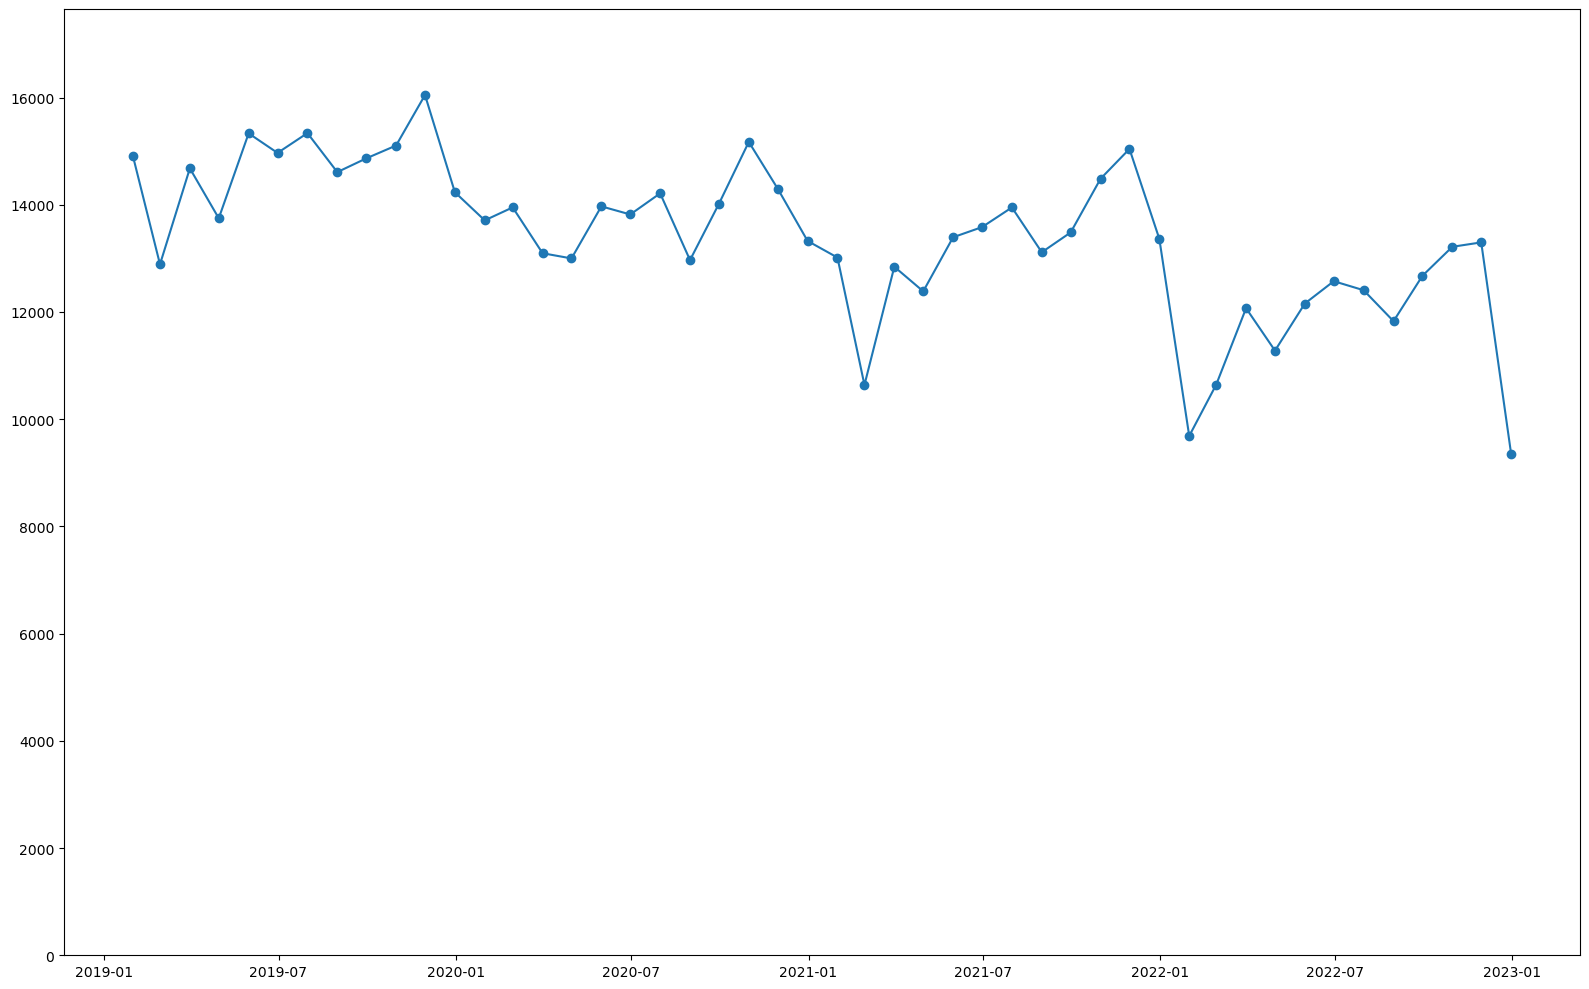

In [85]:
plt.figure(figsize=(16,10))

plt.plot(df2["Tarih"], df2["Sayı"],"-o")
plt.ylim(0, (df2["Sayı"].max() + df2["Sayı"].max()/10))
plt.tight_layout()

plt.show()

In [86]:
from statistics import mean
mevsimsellik = []
mevsim = []

mevsimsellik.append((df2["Sayı"][0] + df2["Sayı"][1])*(3/2))

for i in range(2, len(df2["Sayı"])):
    mevsim.append(df2["Sayı"][i])
    if len(mevsim) == 3:
        mevsimsellik.append(sum(mevsim))
        mevsim = []
    if i == len(df2["Sayı"]) - 1:
        mevsimsellik.append(sum(mevsim))

In [87]:
mevsimsellik = mevsimsellik[:-1]
mevsimsellik

[41688.0,
 43759,
 44913,
 46017,
 41894,
 40065,
 41000,
 43490,
 36979,
 38623,
 40647,
 43011,
 33694,
 35507,
 36808,
 39189]

In [88]:
mevsim = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
mevsim_list = []

In [89]:
yil = 2018
for i in range(0, len(mevsimsellik)):
    if i % 4 == 0:
        yil += 1
        mevsim_list.append(str(yil) + " " + mevsim[0])
    elif i % 4 == 1:
        mevsim_list.append(str(yil) + " " + mevsim[1])
    elif i % 4 == 2:
        mevsim_list.append(str(yil) + " " + mevsim[2])
    elif i % 4 == 3:
        mevsim_list.append(str(yil) + " " + mevsim[3])

In [90]:
mevsim_list

['2019 Kış',
 '2019 İlkbahar',
 '2019 Yaz',
 '2019 Sonbahar',
 '2020 Kış',
 '2020 İlkbahar',
 '2020 Yaz',
 '2020 Sonbahar',
 '2021 Kış',
 '2021 İlkbahar',
 '2021 Yaz',
 '2021 Sonbahar',
 '2022 Kış',
 '2022 İlkbahar',
 '2022 Yaz',
 '2022 Sonbahar']

In [91]:
mevsim_kaza = pd.DataFrame({"Mevsim": mevsim_list, "Ort Kaza": mevsimsellik})
mevsim_kaza

,Mevsim,Ort Kaza
0,2019 Kış,41688.0
1,2019 İlkbahar,43759.0
2,2019 Yaz,44913.0
3,2019 Sonbahar,46017.0
4,2020 Kış,41894.0
5,2020 İlkbahar,40065.0
6,2020 Yaz,41000.0
7,2020 Sonbahar,43490.0
8,2021 Kış,36979.0
9,2021 İlkbahar,38623.0


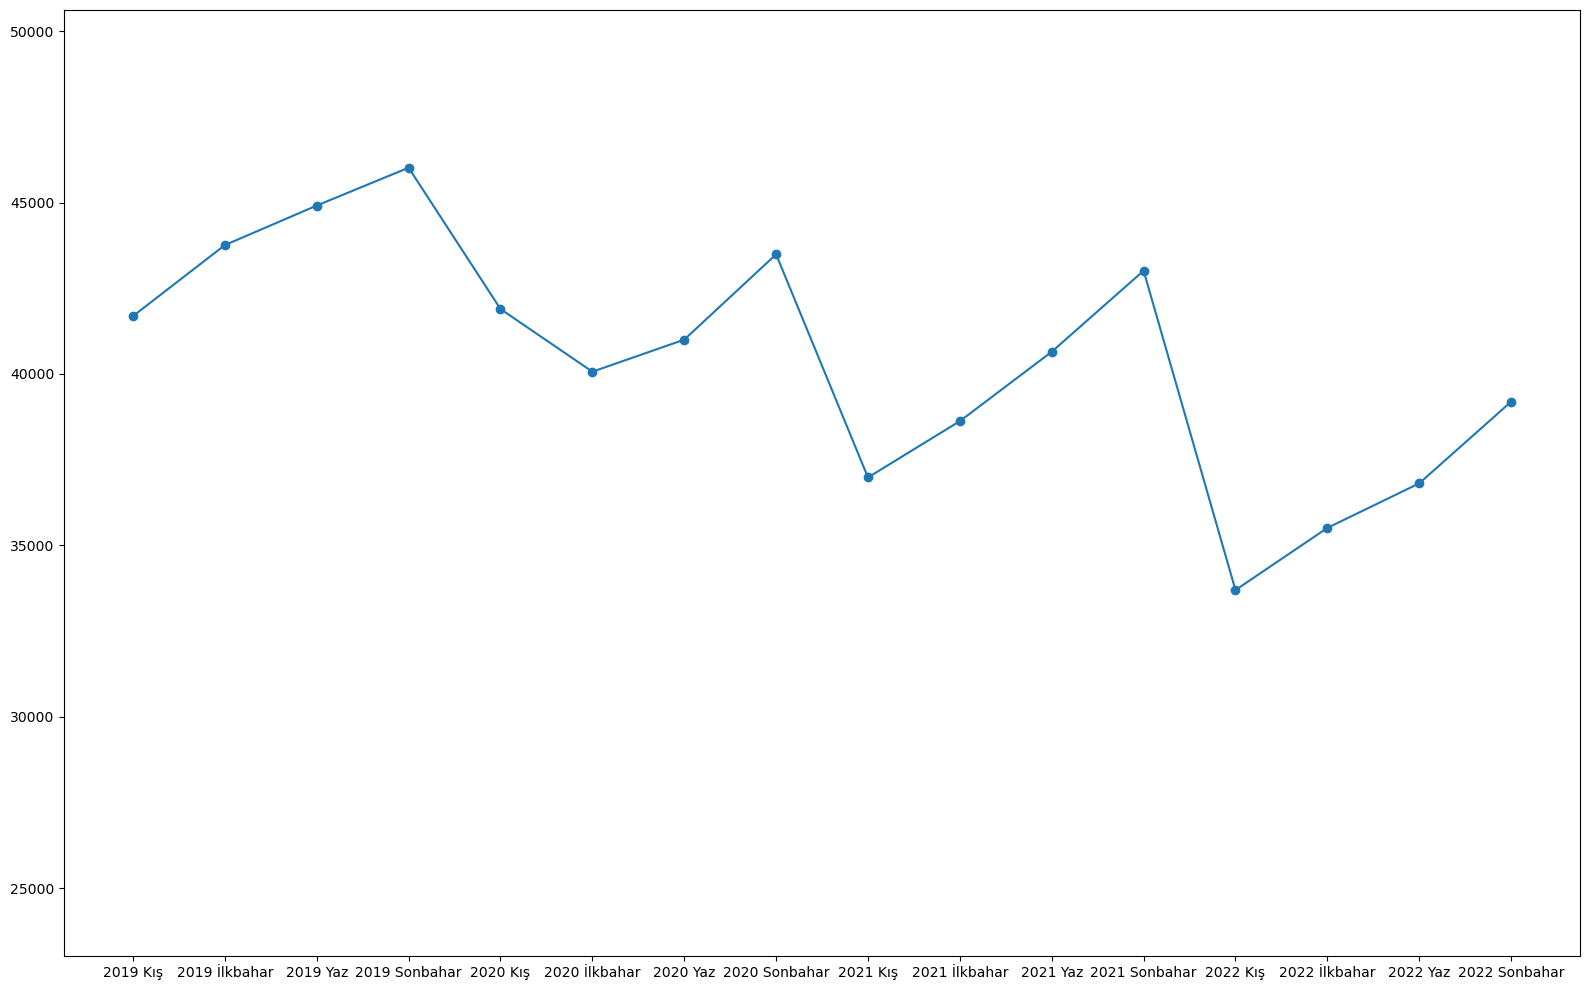

In [92]:
plt.figure(figsize=(16,10))

plt.plot(mevsim_kaza["Mevsim"], mevsim_kaza["Ort Kaza"],"-o")
plt.ylim(mevsim_kaza["Ort Kaza"].max()/2, (mevsim_kaza["Ort Kaza"].max() + mevsim_kaza["Ort Kaza"].max()/10))
plt.tight_layout()

plt.show()

In [93]:
yvals = []
zvals = []
kvals = []
lvals = []
for i in range(0, len(mevsim_kaza)):
    if i % 4 == 0:
        yvals.append(mevsim_kaza["Ort Kaza"][i])
    elif i % 4 == 1:
        zvals.append(mevsim_kaza["Ort Kaza"][i])
    elif i % 4 == 2:
        kvals.append(mevsim_kaza["Ort Kaza"][i])
    elif i % 4 == 3:
        lvals.append(mevsim_kaza["Ort Kaza"][i])

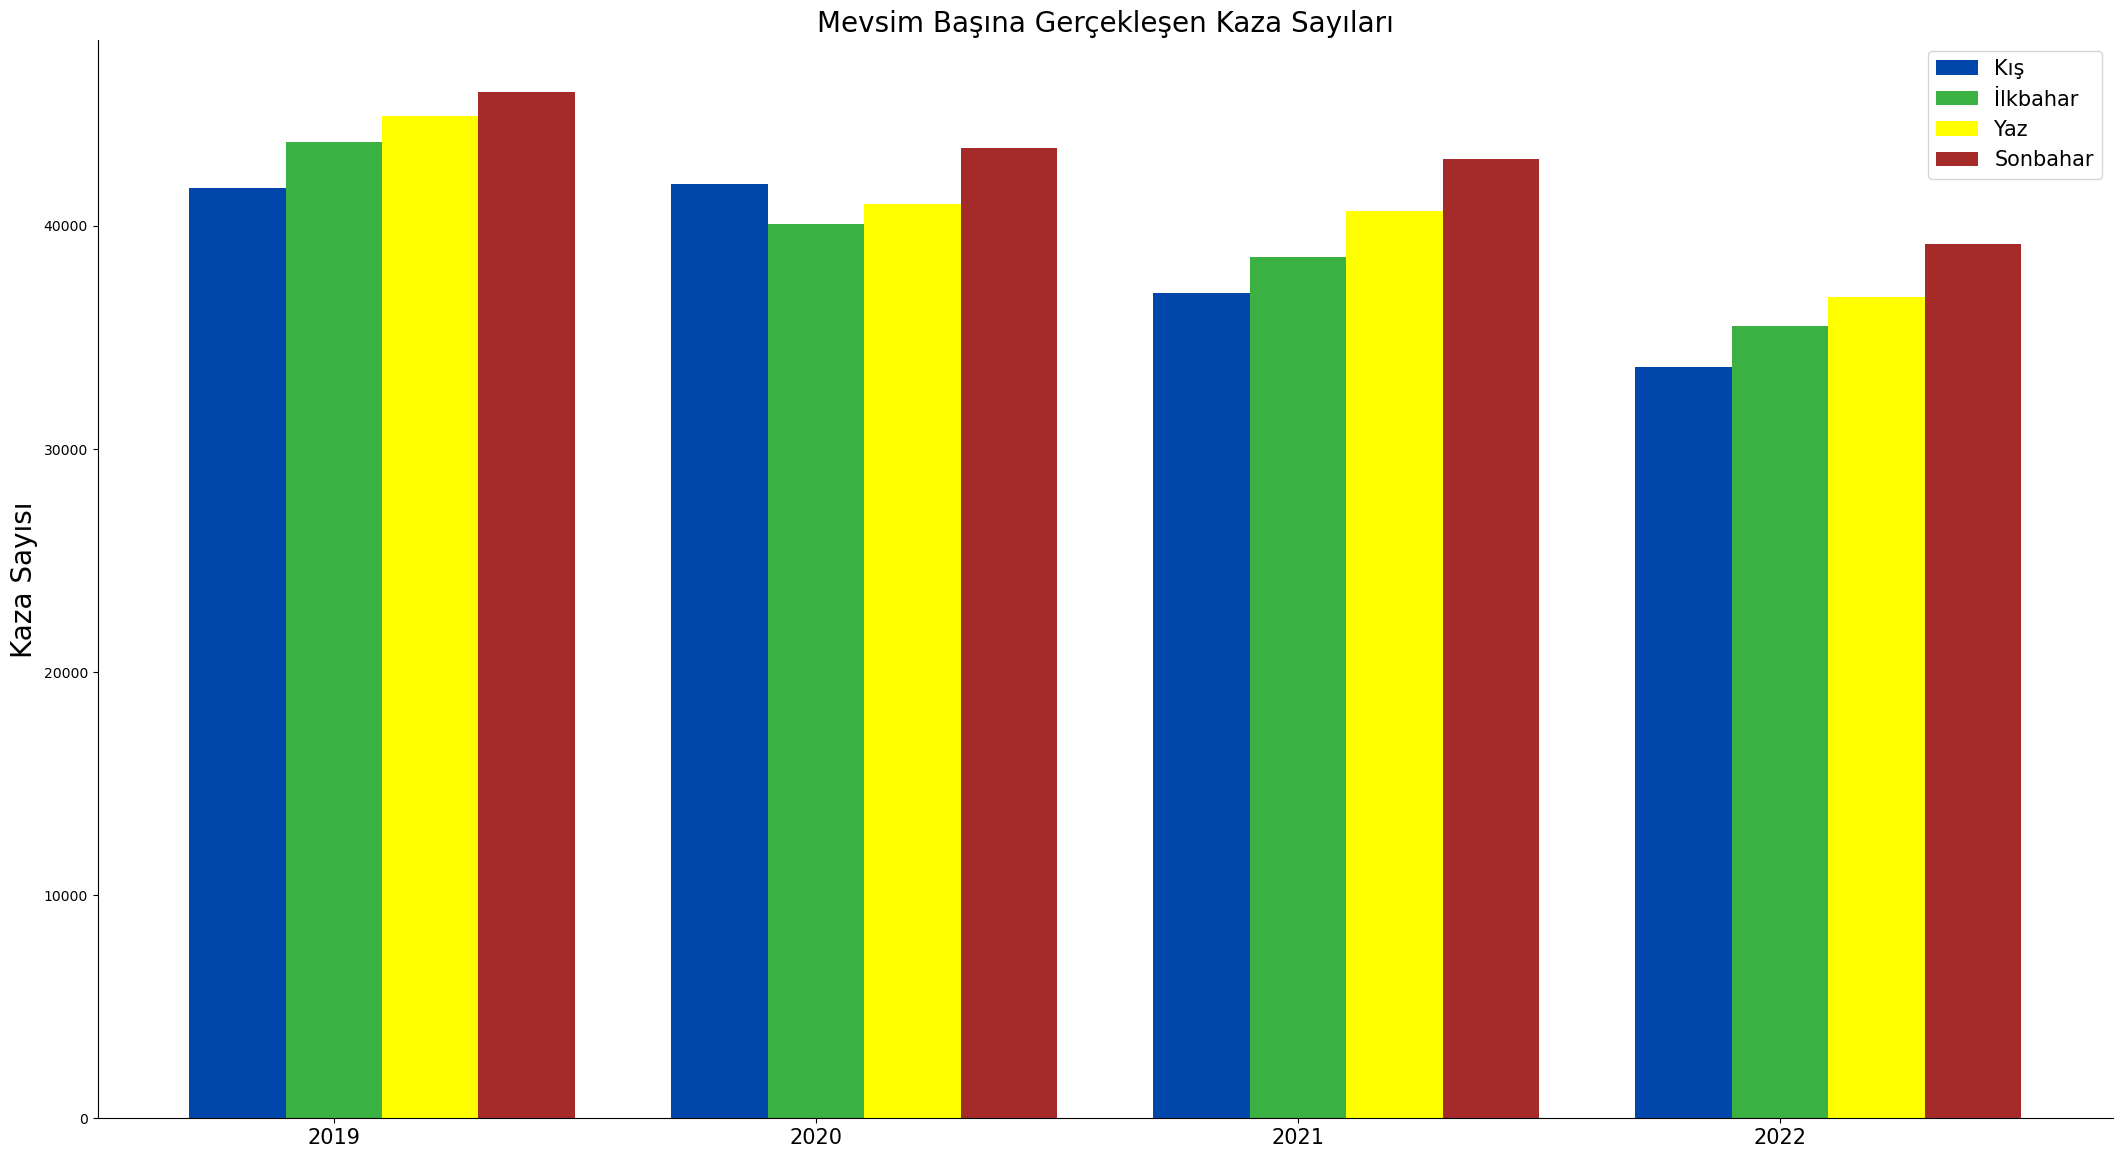

In [94]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars

fig = plt.figure(figsize=(26,14))
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, yvals, width, color='#0147AB')
rects2 = ax.bar(ind+width, zvals, width, color= '#3BB143')
rects3 = ax.bar(ind+width*2, kvals, width, color='yellow')
rects4 = ax.bar(ind+width*3, lvals, width, color='brown')


ax.set_ylabel('Kaza Sayısı')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2019', '2020', '2021', '2022'), fontsize = 15)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4), ('Kış', 'İlkbahar', 'Yaz', 'Sonbahar'), fontsize = 15 )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

ax.set_title("Mevsim Başına Gerçekleşen Kaza Sayıları", fontsize = 20)
ax.set_ylabel("Kaza Sayısı", fontsize = 20)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

Grafik 2

In [95]:
total = df1["Road_Type"].value_counts()
total.sort_index(inplace=True)
total

Road_Type
Dual carriageway       97629
One way street         13223
Roundabout             42753
Single carriageway    482247
Slip road               6893
Name: count, dtype: int64

In [96]:
subset = df1.filter(["Road_Type", "Accident_Severity"])
subset2 = subset.groupby(["Road_Type", "Accident_Severity"]).size().unstack()
subset2.sort_index(inplace=True)
subset2

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1790,11604,84235
One way street,93,1623,11507
Roundabout,140,3603,39010
Single carriageway,6452,69116,406679
Slip road,49,605,6239


In [97]:
for i in range(0, 5):
    subset2.iloc[i] = subset2.iloc[i]/total.iloc[i]
subset2 = subset2*100
subset2

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1.833472,11.885813,86.280716
One way street,0.703320,12.274068,87.022612
Roundabout,0.327462,8.427479,91.245059
Single carriageway,1.337904,14.332075,84.330022
Slip road,0.710866,8.777020,90.512114


In [98]:
subset2.rename(columns={"Fatal": "Ölümcül", "Serious": "Ciddi", "Slight": "Hafif"}, inplace=True)
yol_tipi = ["Çift Şerit Yol", "Tek Yönlü Sokak", "Dönel Kavşak", "Tek Şerit Yol", "Anayola Bağlanan Yol"]
subset2.set_index(pd.Series(yol_tipi), inplace=True, drop=True)
subset2.sort_values(by=["Ölümcül"], ascending=False, inplace=True)
subset2

Accident_Severity,Ölümcül,Ciddi,Hafif
Çift Şerit Yol,1.833472,11.885813,86.280716
Tek Şerit Yol,1.337904,14.332075,84.330022
Anayola Bağlanan Yol,0.710866,8.777020,90.512114
Tek Yönlü Sokak,0.703320,12.274068,87.022612
Dönel Kavşak,0.327462,8.427479,91.245059


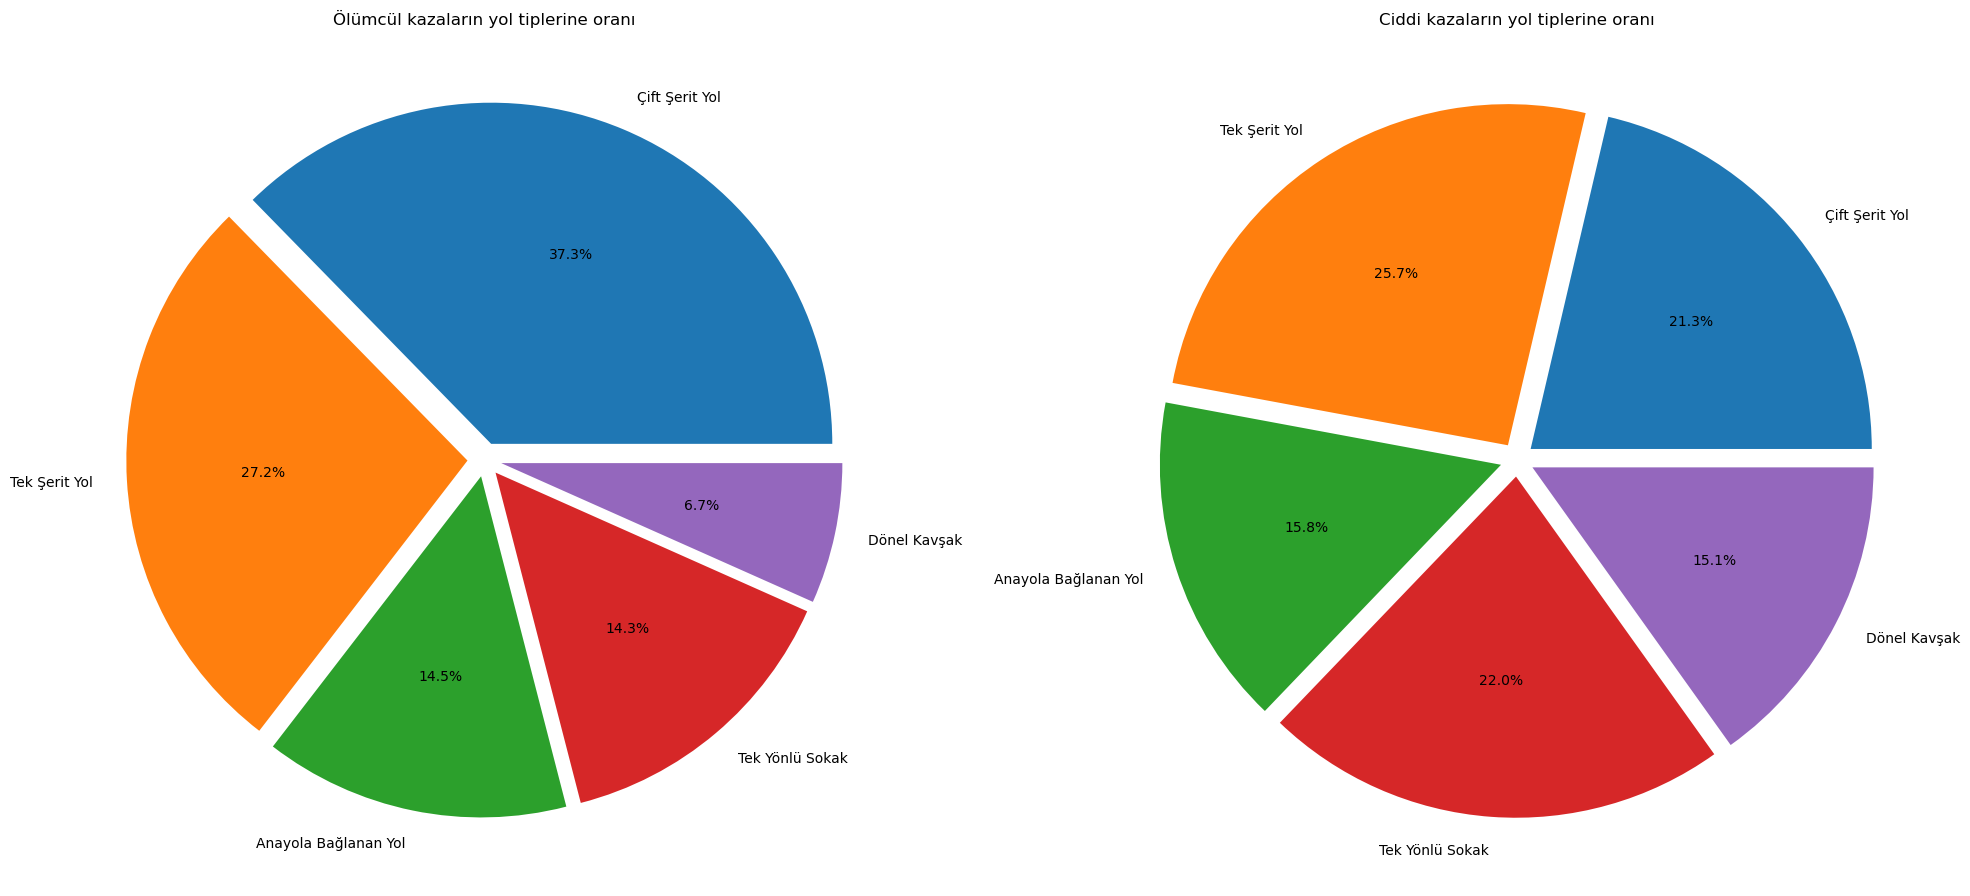

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 14))

ax[0].pie(subset2["Ölümcül"], labels=subset2.index, explode=([0.05]*len(subset2.index)), autopct= "%1.1f%%")
ax[1].pie(subset2["Ciddi"], labels=subset2.index, explode=([0.050]*len(subset2.index)), autopct= "%1.1f%%")

ax[0].set_title("Ölümcül kazaların yol tiplerine oranı")
ax[1].set_title("Ciddi kazaların yol tiplerine oranı")

plt.tight_layout()
plt.show(ax[0])

In [100]:
df1["Light_Conditions"].unique()

array(['Darkness - lights lit', 'Daylight', 'Darkness - lights unlit',
       'Darkness - lighting unknown', 'Darkness - no lighting'],
      dtype=object)

In [101]:
isik = df1.filter(["Accident_Severity", "Light_Conditions"])
isik.rename(columns= {"Light_Conditions": "Işık Şartları", "Accident_Severity": "Kaza Ciddiyeti"}, inplace=True)
isik.replace({"Darkness - lights lit": "Karanlık - Işıklandırma açık", "Daylight": "Gün Işığı", "Darkness - lights unlit": "Karanlık- Işıklandırmalar Kapalı", 
              "Darkness - lighting unknown": "Karanlık - Işıklandırma Bilinmiyor", "Darkness - no lighting": "Karanlık - Işıklandırma Yok"}, inplace=True)
isik.replace({"Fatal": "Ölümcül", "Serious": "Ciddi", "Slight": "Hafif"}, inplace=True)

In [102]:
isik_tehlikeli = isik.loc[isik["Kaza Ciddiyeti"] != "Hafif"]

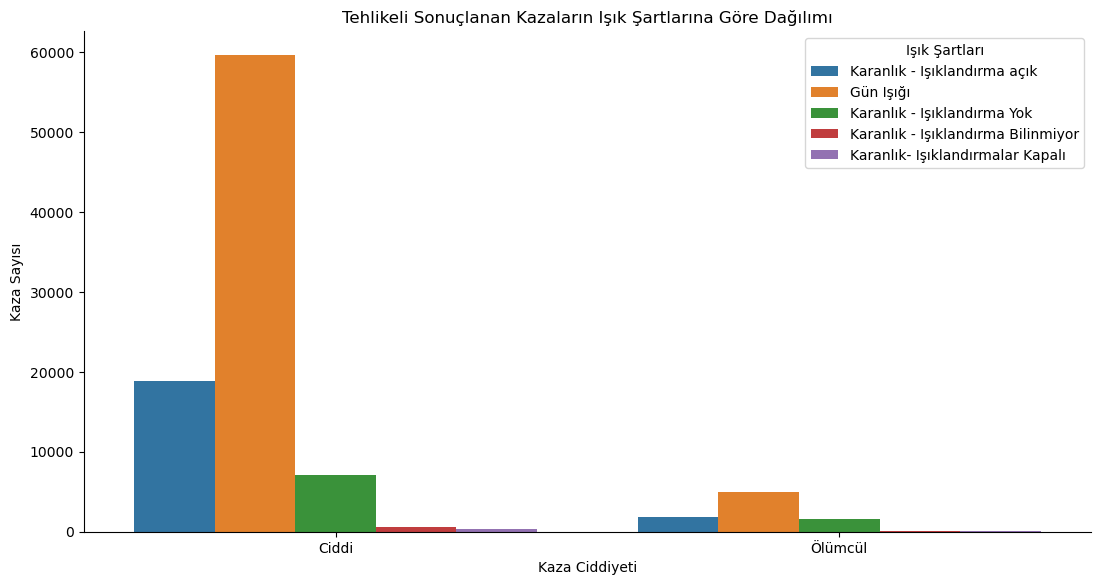

In [103]:
fig= plt.figure(figsize = (13,6.5))
ax = sns.countplot(isik_tehlikeli, x="Kaza Ciddiyeti", hue="Işık Şartları", order=isik_tehlikeli['Kaza Ciddiyeti'].value_counts(ascending=False).index)
plt.ylabel("Kaza Sayısı")

plt.title("Tehlikeli Sonuçlanan Kazaların Işık Şartlarına Göre Dağılımı")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [104]:
df1["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       471884
Darkness - lights lit          126765
Darkness - no lighting          36858
Darkness - lighting unknown      4766
Darkness - lights unlit          2472
Name: count, dtype: int64

In [105]:
best_position = df1.filter(["Light_Conditions", "Accident_Severity"])
best_position = best_position.groupby(["Light_Conditions", "Accident_Severity"]).size().unstack()
best_position

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,54,633,4079
Darkness - lights lit,1844,18824,106097
Darkness - lights unlit,44,353,2075
Darkness - no lighting,1581,7077,28200
Daylight,5001,59664,407219


In [106]:
import plotly.express as px

In [107]:
df1.rename(columns={"Number_of_Casualties": "Yaralı Sayısı", "Number_of_Vehicles": "Kazaya Karışan Araba Sayısı"}, inplace=True)

In [ ]:
fig = px.density_mapbox(df1, lat = 'Latitude', lon = 'Longitude',  z = 'Yaralı Sayısı',
                        radius = 15,
                        zoom = 6,
                        mapbox_style = 'open-street-map',
                        title = "Kazada Yaralanan İnsanların Dağılımı")

fig.update_layout(title_text='Kazada Yaralanan İnsanların Dağılımı', title_x=0.5)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    df1,
    lat='Latitude',
    lon='Longitude',
    color='Yaralı Sayısı',  # Değerlere göre renklendirme
    size='Yaralı Sayısı',   # Değerlere göre daire boyutu
    zoom=3
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()